 ### 201804225 이다진 프로그래밍3-발표 과제 (Telecom users dataset - Practice classification with a telco dataset)

1. 발표 주제 : telecom 데이터를 이용한 4가지 분석포인트에 대해 분석하기
2. 발표 데이터 셋 설명 : Telecom users dataset의 경우 통신사에서 고객을 유지하기 위해 행동 예측을 하려는 데이터 세트로 통신사 고객 이탈 데이터 셋이다. 
    이 때, 한달 이내 이탈한 고객을 뜻하는 churn 열의 중심으로 각 고객이 가입한 서비스, 고객 계정 정보, 고객에 대한 인구 통계 정보가 나와있다.
3. 분석 포인트 : 이번 프로그래밍3 과제 분석에서 이 데이터를 가지고 고객 이탈 예측이 아닌, 서비스를 받기 위한 고객이 들어오려고 할 때 
    추천해줄 수 있는 가이드를 만들어보려고 했다. 
4. 이유 : 고객을 유지하기 위해서는 고객 이탈을 예측해서 막는 것도 중요하지만, 통신사를 이용하고 있는 고객들이 변화를 하고 싶어할 때 혹은 새로운 고객들이 들어올 때 
    이 고객들을 잡아, 통신사를 사용하게끔 유도하는 것도 중요하다고 본다. 

In [171]:
import pandas as pd
import numpy as np

In [172]:
telecom = pd.read_csv('P3_subject1/telecom_users.csv')
telecom = telecom.drop(['Dependents'], axis = 1)

In [173]:
telecom.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [174]:
telecom.shape

(5986, 21)

In [175]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [313]:
#데이터 딕셔너리
pd.read_csv('P3_subject1/telecom_data_dictionary.csv')

,coloumns,explain,kor_explain
0,customerID,customer id,고객ID
1,gender,client gender (male / female),성별
2,SeniorCitizen,"is the client retired (1, 0)",시니어시티즌(고령여부)
3,Partner,"is the client married (Yes, No)",파트너의 유무
4,tenure,how many months a person has been a client of ...,종신 재직원( 회사에 머문 월 수)
5,PhoneService,"is the telephone service connected (Yes, No)",전화 서비스
6,MultipleLines,"are multiple phone lines connected (Yes, No, N...",다중 선 (여러 회선을 가지고 있는지)
7,InternetService,"client's Internet service provider (DSL, Fiber...",인터넷 서비스
8,OnlineSecurity,"is the online security service connected (Yes,...",온라인 보안 유무
9,OnlineBackup,"is the online backup service activated (Yes, N...",온라인 백업 유무


데이터를 설명하는 사전은 위와 같이 존재한다. 
여기서 설명을 하자면, 크게 1. 한달 이내 이탈한 고객을 뜻하는 churn 2. 각 고객이 가입한 서비스 3.고객 계정 정보  4.고객에 대한 인구 통계 정보로 나눠진다. 
- 2번의 경우 전화, 여러 회선, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍TV및동영상
- 3번의 경우 고객, 계약, 결제 방법, 종이없는 청구서, 월별 요금 및 총 요금 
- 4번의 경우 성별, 연령대, 파트너 및 부양가족이 있는 경우
로 나타낸다. 

In [177]:
#각 열의 결측값이 없다는 것을 알 수 있다.

In [178]:
#각 열의 행만 가져온다면
telecom.columns
#각 열의 인덱스만 가져온다면
telecom.index
#각 열의 데이터 가져온다면
telecom.to_numpy()

array([[1869, '7010-BRBUU', 'Male', ..., 24.1, '1734.65', 'No'],
       [4528, '9688-YGXVR', 'Female', ..., 88.15, '3973.2', 'No'],
       [6344, '9286-DOJGF', 'Female', ..., 74.95, '2869.85', 'Yes'],
       ...,
       [5226, '8044-BGWPI', 'Male', ..., 21.15, '306.05', 'No'],
       [5390, '7450-NWRTR', 'Male', ..., 99.45, '1200.15', 'Yes'],
       [860, '4795-UXVCJ', 'Male', ..., 19.8, '457.3', 'No']],
      dtype=object)

In [179]:
#info를 확인해보면 
#dtypes: float64(1), int64(3), object(18)
telecom.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object>

In [180]:
telecom.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [181]:
telecom.Churn.value_counts(normalize= True)

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64

In [182]:
#describe를 통한 기술통계
telecom.describe(include ='object').T

,count,unique,top,freq
customerID,5986,5986,9214-EKVXR,1
gender,5986,2,Male,3050
Partner,5986,2,No,3082
PhoneService,5986,2,Yes,5396
MultipleLines,5986,3,No,2848
InternetService,5986,3,Fiber optic,2627
OnlineSecurity,5986,3,No,2982
OnlineBackup,5986,3,No,2605
DeviceProtection,5986,3,No,2640
TechSupport,5986,3,No,2960


In [183]:
telecom.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [184]:
# 데이터 용량 줄이기

In [185]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [186]:
telecom.memory_usage(deep=True)

Index                  128
Unnamed: 0           47888
customerID          401062
gender              371018
SeniorCitizen        47888
Partner             356078
tenure               47888
PhoneService        358570
MultipleLines       363982
InternetService     378885
OnlineSecurity      376834
OnlineBackup        377211
DeviceProtection    377176
TechSupport         376856
StreamingTV         377427
StreamingMovies     377460
Contract            408704
PaperlessBilling    356702
PaymentMethod       452395
MonthlyCharges       47888
TotalCharges        376432
Churn               354761
dtype: int64

In [187]:
#1. int64 형태 알아보기
#SeniorCitizen의 경우 1,0으로 나누어져 있어 int64의 값이 필요 없음, int8형태로 변환 #47888
telecom['SeniorCitizen'] = telecom['SeniorCitizen'].astype('category')

In [188]:
telecom.memory_usage(deep=True) #6082

Index                  128
Unnamed: 0           47888
customerID          401062
gender              371018
SeniorCitizen         6082
Partner             356078
tenure               47888
PhoneService        358570
MultipleLines       363982
InternetService     378885
OnlineSecurity      376834
OnlineBackup        377211
DeviceProtection    377176
TechSupport         376856
StreamingTV         377427
StreamingMovies     377460
Contract            408704
PaperlessBilling    356702
PaymentMethod       452395
MonthlyCharges       47888
TotalCharges        376432
Churn               354761
dtype: int64

In [189]:
print(6082 / 47888 * 100, '%')

12.700467758102238 %


In [190]:
#2. object형을 category로!
#customerID, TotalCharges를 제외한 나머지는 category형으로
telecom.select_dtypes(include=['object']).nunique()

customerID          5986
gender                 2
Partner                2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        5611
Churn                  2
dtype: int64

In [191]:
telecom['gender'] = telecom['gender'].astype('category')
telecom['Partner'] = telecom['Partner'].astype('category')
telecom['PhoneService'] = telecom['PhoneService'].astype('category')
telecom['MultipleLines'] = telecom['MultipleLines'].astype('category')
telecom['InternetService'] = telecom['InternetService'].astype('category')
telecom['OnlineSecurity'] = telecom['OnlineSecurity'].astype('category')
telecom['OnlineBackup'] = telecom['OnlineBackup'].astype('category')
telecom['DeviceProtection'] = telecom['DeviceProtection'].astype('category')
telecom['TechSupport'] = telecom['TechSupport'].astype('category')
telecom['StreamingTV'] = telecom['StreamingTV'].astype('category')
telecom['StreamingMovies'] = telecom['StreamingMovies'].astype('category')
telecom['Contract'] = telecom['Contract'].astype('category')
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].astype('category')
telecom['PaymentMethod'] = telecom['PaymentMethod'].astype('category')
telecom['Churn'] = telecom['Churn'].astype('category')
#telecom['TotalCharges'] = telecom['TotalCharges'].astype(np.float64)

In [192]:
telecom.memory_usage(deep=True)

Index                  128
Unnamed: 0           47888
customerID          401062
gender                6190
SeniorCitizen         6082
Partner               6185
tenure               47888
PhoneService          6185
MultipleLines         6258
InternetService       6253
OnlineSecurity        6261
OnlineBackup          6261
DeviceProtection      6261
TechSupport           6261
StreamingTV           6261
StreamingMovies       6261
Contract              6267
PaperlessBilling      6185
PaymentMethod         6450
MonthlyCharges       47888
TotalCharges        376432
Churn                 6185
dtype: int64

In [193]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   int64   
 1   customerID        5986 non-null   object  
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   tenure            5986 non-null   int64   
 6   PhoneService      5986 non-null   category
 7   MultipleLines     5986 non-null   category
 8   InternetService   5986 non-null   category
 9   OnlineSecurity    5986 non-null   category
 10  OnlineBackup      5986 non-null   category
 11  DeviceProtection  5986 non-null   category
 12  TechSupport       5986 non-null   category
 13  StreamingTV       5986 non-null   category
 14  StreamingMovies   5986 non-null   category
 15  Contract          5986 non-null   category
 16  PaperlessBilling  5986 n

In [194]:
#메모리 용량이 982.2+ KB -> 329.1+KB으로 절반 이상이 줄어듦을 알 수 있다! -> 용량 줄이기 성공!

2. 본격적인 데이터 탐색과 분석 포인트 설명

- 분석 포인트 
1. 서비스를 받는 사람들이 매달 요금 내는 정도는 과연 어느 편에 속할 것인가? 
2. 서비스를 받는 사람들은 기기 보험을 들었을 것인가? 
3. 기기 보험을 든 사람들은 요금을 많이 내는 쪽인가, 적게 내는 쪽인가? 
4. 서비스를 받는 사람들은 Contract, InternetService는 어떻게 분포되어있는가? 

In [195]:
#filter 함수 적용하기 #telecom 관련 서비스만 
#기준 : **서비스를 connected 하는가를 다루는 열들만 
cols_one = [ c for c in telecom.columns if 'Service' in c]
print('cols:', cols_one)
cols_two = [ c for c in telecom.columns if 'Online' in c]
print('cols:', cols_two)
cols_third = [ c for c in telecom.columns if 'Streaming' in c]
print('cols:', cols_third)
cols_four = [ c for c in telecom.columns if 'Support' in c]
print('cols:', cols_four)
print('cols_all:', cols_one,cols_two,cols_third,cols_four)

cols: ['PhoneService', 'InternetService']
cols: ['OnlineSecurity', 'OnlineBackup']
cols: ['StreamingTV', 'StreamingMovies']
cols: ['TechSupport']
cols_all: ['PhoneService', 'InternetService'] ['OnlineSecurity', 'OnlineBackup'] ['StreamingTV', 'StreamingMovies'] ['TechSupport']


In [196]:
#서비스 관련 부분 Service로 따로 빼놓기
Service = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'TechSupport', 'MonthlyCharges']
telecom[Service]

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,TechSupport,MonthlyCharges
0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,24.10
1,Yes,Fiber optic,No,Yes,Yes,No,No,88.15
2,Yes,Fiber optic,No,No,No,No,No,74.95
3,Yes,DSL,No,No,No,Yes,No,55.90
4,Yes,DSL,Yes,No,No,No,No,53.45
...,...,...,...,...,...,...,...,...
5981,Yes,Fiber optic,Yes,No,Yes,Yes,No,95.00
5982,Yes,DSL,Yes,Yes,Yes,Yes,Yes,91.10
5983,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,21.15
5984,Yes,Fiber optic,No,No,Yes,Yes,No,99.45


분석 포인트 4가지를 잡았으므로 이와 관련된 EDA를 시작해보기!

In [197]:
#1. float64, int64 형변환 시키기 
#telecom.groupby('Unnamed: 0').size()
# Unnamed: 0에 대한 고유의 값이 2개 이상인 것이 없는 걸 확인함
telecom['Unnamed: 0'].value_counts().sort_index()

0       1
1       1
2       1
3       1
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: Unnamed: 0, Length: 5986, dtype: int64

In [198]:
np.finfo(np.float16) #finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

telecom[['tenure']].describe().T 

,count,mean,std,min,25%,50%,75%,max
tenure,5986.0,32.46876,24.516391,0.0,9.0,29.0,56.0,72.0


In [199]:
telecom['tenure'] = telecom['tenure'].astype(np.int8)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   int64   
 1   customerID        5986 non-null   object  
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   tenure            5986 non-null   int8    
 6   PhoneService      5986 non-null   category
 7   MultipleLines     5986 non-null   category
 8   InternetService   5986 non-null   category
 9   OnlineSecurity    5986 non-null   category
 10  OnlineBackup      5986 non-null   category
 11  DeviceProtection  5986 non-null   category
 12  TechSupport       5986 non-null   category
 13  StreamingTV       5986 non-null   category
 14  StreamingMovies   5986 non-null   category
 15  Contract          5986 non-null   category
 16  PaperlessBilling  5986 n

In [200]:
telecom[['MonthlyCharges']].describe().T 

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,5986.0,64.802213,30.114702,18.25,35.65,70.4,89.9,118.75


In [201]:
# telecom['TotalCharges'] = telecom['TotalCharges'].astype(float) -> 에러 [could not convert string to float: '']
telecom['TotalCharges']= pd.to_numeric(telecom.TotalCharges, errors ='coerce')
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   int64   
 1   customerID        5986 non-null   object  
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   tenure            5986 non-null   int8    
 6   PhoneService      5986 non-null   category
 7   MultipleLines     5986 non-null   category
 8   InternetService   5986 non-null   category
 9   OnlineSecurity    5986 non-null   category
 10  OnlineBackup      5986 non-null   category
 11  DeviceProtection  5986 non-null   category
 12  TechSupport       5986 non-null   category
 13  StreamingTV       5986 non-null   category
 14  StreamingMovies   5986 non-null   category
 15  Contract          5986 non-null   category
 16  PaperlessBilling  5986 n

In [202]:
#telecom.isna().sum() ->결측값 생김
telecom[telecom['TotalCharges'].isnull()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1340,1371-DWPAZ,Female,0,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3826,3213-VVOLG,Male,0,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,5218,2923-ARZLG,Male,0,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,3331,7644-OMVMY,Male,0,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,936,5709-LVOEQ,Female,0,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,753,3115-CZMZD,Male,0,No,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,4380,2520-SGTTA,Female,0,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,488,4472-LVYGI,Female,0,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,1082,4367-NUYAO,Male,0,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [203]:
telecom_row = pd.read_csv('P3_subject1/telecom_users.csv')
telecom_row.iloc[[356,634,2771,3086,3255,4326,5375,5382,5695,5951]]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [204]:
telecom['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [205]:
#min : 18.800000
telecom['TotalCharges'].describe()

count    5976.000000
mean     2298.060617
std      2274.127165
min        18.800000
25%       404.312500
50%      1412.150000
75%      3846.962500
max      8684.800000
Name: TotalCharges, dtype: float64

In [206]:
#최소 값이 18.8이므로 결측값은 0 or 날리기(10개) -> 날리는걸 선택!
telecom.drop(columns= 'TotalCharges')
telecom['TotalCharges'].describe()

count    5976.000000
mean     2298.060617
std      2274.127165
min        18.800000
25%       404.312500
50%      1412.150000
75%      3846.962500
max      8684.800000
Name: TotalCharges, dtype: float64

In [207]:
telecom['MonthlyCharges'] = telecom['MonthlyCharges'].astype(np.float16)
telecom['TotalCharges'] = telecom['TotalCharges'].astype(np.float16)

In [208]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   int64   
 1   customerID        5986 non-null   object  
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   tenure            5986 non-null   int8    
 6   PhoneService      5986 non-null   category
 7   MultipleLines     5986 non-null   category
 8   InternetService   5986 non-null   category
 9   OnlineSecurity    5986 non-null   category
 10  OnlineBackup      5986 non-null   category
 11  DeviceProtection  5986 non-null   category
 12  TechSupport       5986 non-null   category
 13  StreamingTV       5986 non-null   category
 14  StreamingMovies   5986 non-null   category
 15  Contract          5986 non-null   category
 16  PaperlessBilling  5986 n

#메모리 용량이 982.2+ KB -> 329.1+KB-> (현재) 218.1+ KB

In [209]:
round(218.1/982.2, 2)

0.22

처음과 비교하면 22%의 메모리만 사용하여 매우 큰 메모리 세이브를 했다.

1. 한가지 이상 서비스를 받는 사람들이 매달 요금 내는 정도는 과연 어느 편에 속할 것인가?

In [309]:
# 서비스의 항목들만 있는 열을 가지고 오기
Services= telecom[Service]
Services.head()
Services.info() # 5986 

# 한 가지 이상 서비스를 받기 위해서는 PhoneService가 No인 사람들 : 약 10%
Services.PhoneService.value_counts() #590

#90%의 사람들을 뽑아내기 #5396명
is_Services = Services['PhoneService'] == 'Yes'
is_Services = Services[is_Services]
is_Services #5396

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PhoneService     5986 non-null   category
 1   InternetService  5986 non-null   category
 2   OnlineSecurity   5986 non-null   category
 3   OnlineBackup     5986 non-null   category
 4   StreamingTV      5986 non-null   category
 5   StreamingMovies  5986 non-null   category
 6   TechSupport      5986 non-null   category
 7   MonthlyCharges   5986 non-null   float16 
dtypes: category(7), float16(1)
memory usage: 53.4 KB


,PhoneService,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,TechSupport,MonthlyCharges
0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,24.093750
1,Yes,Fiber optic,No,Yes,Yes,No,No,88.125000
2,Yes,Fiber optic,No,No,No,No,No,74.937500
3,Yes,DSL,No,No,No,Yes,No,55.906250
4,Yes,DSL,Yes,No,No,No,No,53.437500
...,...,...,...,...,...,...,...,...
5981,Yes,Fiber optic,Yes,No,Yes,Yes,No,95.000000
5982,Yes,DSL,Yes,Yes,Yes,Yes,Yes,91.125000
5983,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,21.156250
5984,Yes,Fiber optic,No,No,Yes,Yes,No,99.437500


In [211]:
#OnlineSecurity, OnlineBackup, StreamingTV, StreamingMovies, TechSupport의 경우 InternetService에 연관되어 있다.
is_Services.InternetService.value_counts("No") 

Fiber optic    0.486842
DSL            0.273907
No             0.239251
Name: InternetService, dtype: float64

- 약 77퍼의 사람들이 인터넷서비스를 제공받고 있다. 

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='InternetService'>

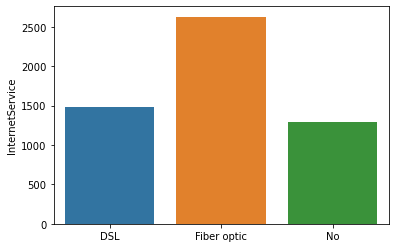

In [212]:
#seaborn
import seaborn as sns
sns.barplot(is_Services.InternetService.value_counts().index, is_Services.InternetService.value_counts())

In [213]:
Charge = telecom[['MonthlyCharges','TotalCharges']]

In [215]:
is_Services.groupby('InternetService').MonthlyCharges.agg(['mean','std'])

,mean,std
InternetService,,
DSL,64.56250,13.418059
Fiber optic,91.56250,12.715182
No,21.09375,2.186129


C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

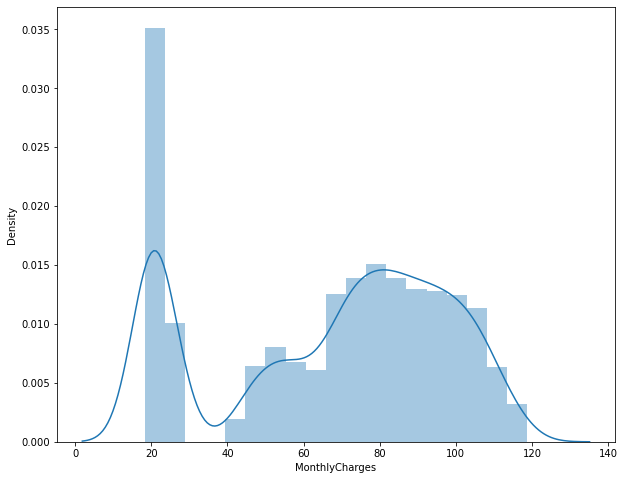

In [216]:
is_Services.MonthlyCharges.value_counts(dropna=False)
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(is_Services.MonthlyCharges, ax=ax)
#sns.histplot(is_Services.MonthlyCharges, ax=ax, binwidth=2)

<AxesSubplot:>

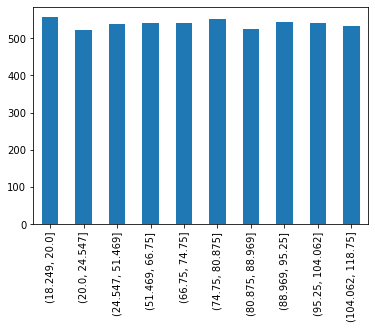

In [217]:
(
 is_Services.MonthlyCharges.pipe(
 lambda ser: pd.qcut(ser, q=10)
 ).value_counts().sort_index().plot.bar()
)

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

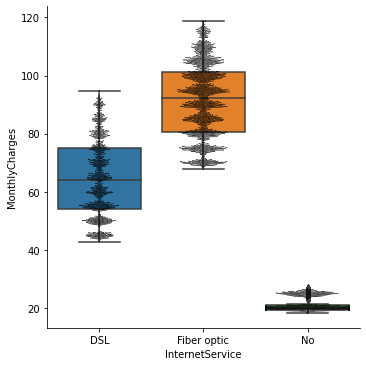

In [218]:
# 매달 내는 요금이 어느정도인지 살펴보기 위함이므로 MonthlyCharges 열 사용
g =sns.catplot(x='InternetService', y='MonthlyCharges', data=is_Services, kind='box')
sns.swarmplot(x='InternetService', y='MonthlyCharges', data=is_Services, color='k', size=1, ax=g.ax)

1. 여기서 DSL을 제공받는 사람들은 평균 60.56달러, 최소 40 최대 100 미만으로 분포되어있고, 
2. FOI의 경우 평균 91.56250 달러, 최소 60달러 이상 최대 약 120달러까지로 분포되어 있다.
3. 여기서 나타나는 결론 도출은 
 ★ 만약 DSL과 FOI의 서비스 수준의 차이가 극명하게 나타나, FOI의 서비스가 필요한 사람들에게는 좋은 선택지나, 
 둘의 수준의 경우가 비슷하거나 서비스를 받는데에 있어 FOI의 수준까지 필요없는 사람들은 DSL에서 제공하는 인터넷 서비스로 바꾸는 것을 추천한다는 것이다.
 ★ 인터넷 서비스를 이용하지 않은 사람들과 사용하는 사람들의 금액차이가 매우 두드러지게 보이게 됨으로, 
 서비스가 필수적이지 않은 사람들은 경제적 비용을 위해 하지 않거나, 그나마 비용이 적은 DSL을 추천할 것이다.
 
 -DSL: 지역 전화망을 통해 디지털 데이터 전송을 제공하는 기술의 계열
 
 -FOI: 광 섬유를 이용한 인터넷 서비스

2. 서비스를 받는 사람들은 기기 보험을 들었을 것인가?

In [219]:
Device = ['PhoneService', 'InternetService', 'DeviceProtection']
Is_Device= telecom[Device]
Is_Device.head()

,PhoneService,InternetService,DeviceProtection
0,Yes,No,No internet service
1,Yes,Fiber optic,Yes
2,Yes,Fiber optic,No
3,Yes,DSL,No
4,Yes,DSL,Yes


In [220]:
#90%의 사람들을 뽑아내기 #5396명
Device_Yes = Is_Device['PhoneService'] == 'Yes'
Device_Yes = Is_Device[Device_Yes]
Device_Yes.info() # 5396 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 0 to 5985
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PhoneService      5396 non-null   category
 1   InternetService   5396 non-null   category
 2   DeviceProtection  5396 non-null   category
dtypes: category(3)
memory usage: 58.3 KB


In [221]:
#10%의 사람들을 뽑아내기 #590명
Device_No = Is_Device['PhoneService'] == 'No'
Device_No = Is_Device[Device_No]
Device_No.info() # 5396

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 5 to 5980
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PhoneService      590 non-null    category
 1   InternetService   590 non-null    category
 2   DeviceProtection  590 non-null    category
dtypes: category(3)
memory usage: 6.6 KB


- 90%, 10%로 나누지 않고 한 crosstab

In [222]:
pd.crosstab(Is_Device.InternetService,Is_Device.DeviceProtection)

DeviceProtection,No,No internet service,Yes
InternetService,,,
DSL,1158,0,910
Fiber optic,1482,0,1145
No,0,1291,0


In [223]:
pd.crosstab([Is_Device.InternetService,Is_Device.DeviceProtection],Is_Device.PhoneService)

PhoneService                          No   Yes
InternetService DeviceProtection              
DSL             No                   326   832
                Yes                  264   646
Fiber optic     No                     0  1482
                Yes                    0  1145
No              No internet service    0  1291

<AxesSubplot:xlabel='InternetService,PhoneService'>

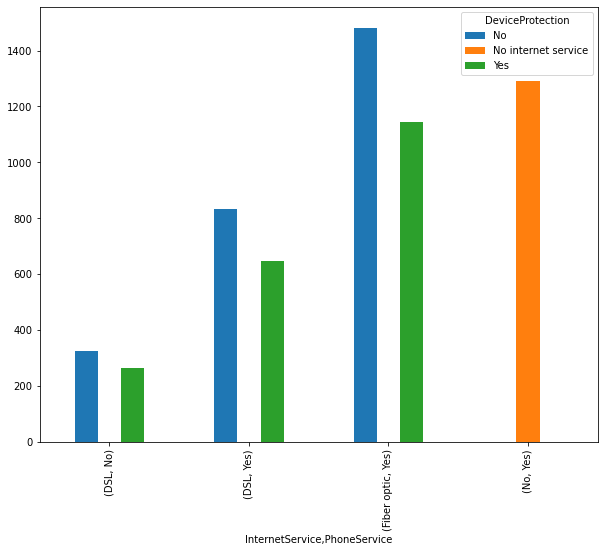

In [224]:
# crosstab 을 시각화합니다.
fig, ax = plt.subplots(figsize=(10, 8))
(
 Is_Device.pipe(lambda df_: pd.crosstab([Is_Device.InternetService,Is_Device.PhoneService],Is_Device.DeviceProtection))
 .plot.bar(ax=ax)
)

- Device_Yes, Device_No의 crosstab

<AxesSubplot:xlabel='InternetService'>

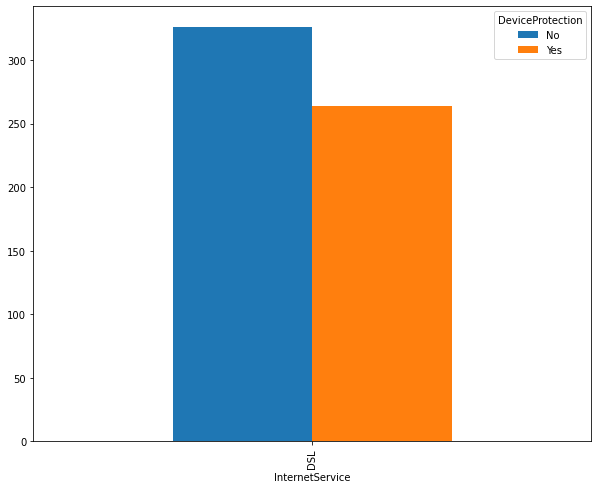

In [225]:
pd.crosstab(Device_No.DeviceProtection,Device_No.InternetService)

# crosstab 을 시각화합니다.
fig, ax = plt.subplots(figsize=(10, 8))
(
 Device_No.pipe(lambda df_: pd.crosstab(Device_No.InternetService,Device_No.DeviceProtection))
 .plot.bar(ax=ax)
)

<AxesSubplot:xlabel='InternetService'>

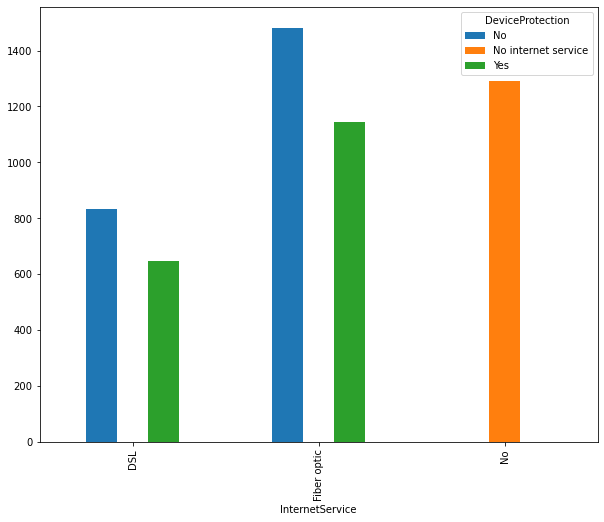

In [226]:
pd.crosstab(Device_Yes.DeviceProtection,Device_Yes.InternetService)

fig, ax = plt.subplots(figsize=(10, 8))
(
 Device_Yes.pipe(lambda df_: pd.crosstab(Device_Yes.InternetService,Device_Yes.DeviceProtection))
 .plot.bar(ax=ax)
)

- 2번째 분석 포인트에 대한 결론
서비스를 받는 사람들 중 기기 보험을 든 사람들보다, 안 들은 사람들이 더 많았으며 DSL,FOI를 가리지 않고 
보험을 듣지 않은 사람들이 %차치하고 있음을 보였다.
그리고 서비스를 받지 않는 다고 해서 아예 기기 보험을 들지 않을 것 편견을 보여주는 결론임을 알 수 있다. 

★ 기기보험의 경우, 서비스의 유무에 따라 달라지지 않는다는 것을 알 수 있었고, 서비스를 받지 않는다고 해서 기기보험을 들지 않는것도 아니다라는 결론을 내릴 수 있다.

3. 기기 보험을 든 사람들은 요금을 많이 내는 쪽인가, 적게 내는 쪽인가? 

In [239]:
DeviceMomey = ['DeviceProtection', 'MonthlyCharges', 'TotalCharges']
DeviceMomey= telecom[DeviceMomey]
DeviceMomey.head()

,DeviceProtection,MonthlyCharges,TotalCharges
0,No internet service,24.09375,1735.0
1,Yes,88.12500,3974.0
2,No,74.93750,2870.0
3,No,55.90625,238.5
4,Yes,53.43750,119.5


In [243]:
n1 = DeviceMomey.DeviceProtection == 'Yes'
n2 = DeviceMomey.MonthlyCharges < 64
n3 = DeviceMomey.TotalCharges < 2298

n_final = n1 &n2 &n3

In [246]:
DeviceMomey[n1]

,DeviceProtection,MonthlyCharges,TotalCharges
1,Yes,88.12500,3974.0
4,Yes,53.43750,119.5
5,Yes,49.84375,3370.0
8,Yes,35.56250,1309.0
9,Yes,116.50000,6384.0
...,...,...,...
5976,Yes,107.93750,5292.0
5977,Yes,102.12500,6540.0
5979,Yes,89.37500,6376.0
5982,Yes,91.12500,2198.0


In [245]:
#n_final.head()
DeviceMomey[n_final]

,DeviceProtection,MonthlyCharges,TotalCharges
4,Yes,53.43750,119.50
8,Yes,35.56250,1309.00
48,Yes,54.75000,445.75
59,Yes,55.25000,1716.00
63,Yes,61.18750,2021.00
...,...,...,...
5926,Yes,48.68750,340.25
5929,Yes,59.81250,825.00
5963,Yes,50.81250,463.50
5964,Yes,36.25000,1151.00


In [250]:
print((236/2055) * 100)

11.48418491484185


보험을 드는 사람들 중, MonthlyCharges, TotalCharges의 평균보다 아래의 금액을 내는 사람들의 2055중 236 밖에 되지 않음을 알 수 있다. 
- 이 수치의 경우 약 11.5%의 사람이 존재함을 보여준다.
- 즉, 평균적 금액을 쓰고 있는 사람 혹은 그 이하의 금액을 내는 사람들의 경우 기기 보험을 들지 않는다.

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DeviceProtection', ylabel='TotalCharges'>

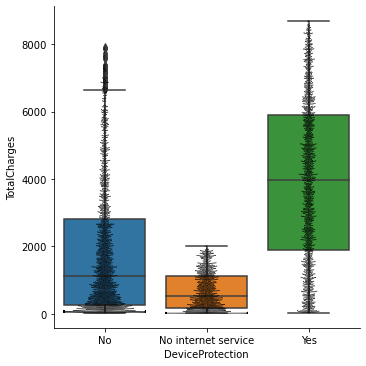

In [256]:
# 총 요금에서의 기기 보험 유무 확인 위함이므로 TotalCharges 열 사용
g =sns.catplot(x='DeviceProtection', y='TotalCharges', data=DeviceMomey, kind='box')
sns.swarmplot(x='DeviceProtection', y='TotalCharges', data=DeviceMomey, color='k', size=1, ax=g.ax)

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DeviceProtection', ylabel='MonthlyCharges'>

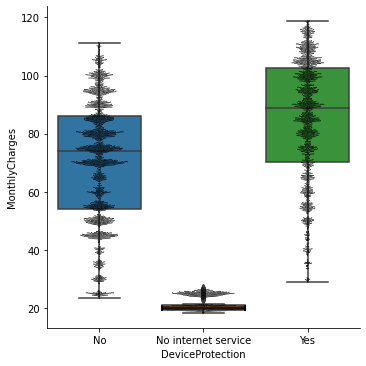

In [255]:
# 매달 내는 요금이 어느정도인지 살펴보기 위함이므로 MonthlyCharges 열 사용
e =sns.catplot(x='DeviceProtection', y='MonthlyCharges', data=DeviceMomey, kind='box')
sns.swarmplot(x='DeviceProtection', y='MonthlyCharges', data=DeviceMomey, color='k', size=1, ax=e.ax)

<AxesSubplot:ylabel='Frequency'>

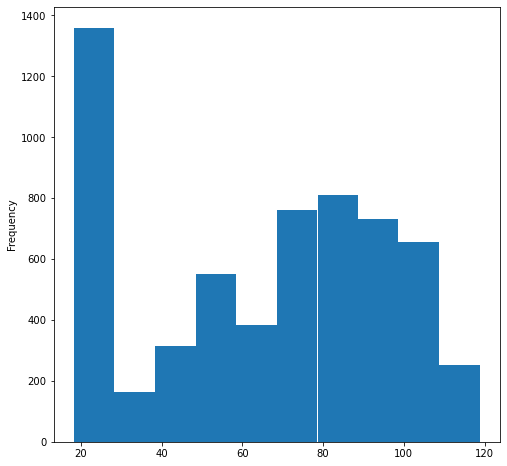

In [253]:
Money_month= DeviceMomey['MonthlyCharges']
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
Money_month.plot.hist()

4. 서비스를 받는 사람들은 Contract, InternetService는 어떻게 분포되어있는가?
- -> InternetService는 위에서 많이 다룬것 처럼 / 쓰는 사람 90%, 안쓰는 사람 10%로 나타낼 수 있다.

<AxesSubplot:xlabel='InternetService,PhoneService'>

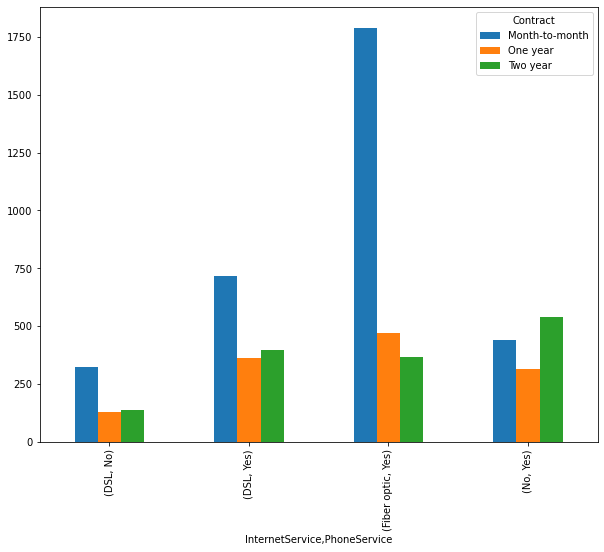

In [285]:
fig, ax = plt.subplots(figsize=(10, 8))
(
 Device_Yes.pipe(lambda df_: pd.crosstab([telecom.InternetService,telecom.PhoneService],telecom.Contract))
 .plot.bar(ax=ax)
)

In [308]:
pd.crosstab([telecom.InternetService,telecom.PhoneService],telecom.Contract)

Contract                      Month-to-month  One year  Two year
InternetService PhoneService                                    
DSL             No                       324       130       136
                Yes                      717       363       398
Fiber optic     Yes                     1790       469       368
No              Yes                      438       314       539

- 4번의 결론 
0. 서비스를 받는 사람들의 경우 'Month-to-month'의 형태로 계약하였음을 나타내고 그 중 InternetService를 받지 않는 사람들은 'Two year'로 계약한 형태가 더 많음을 나타낸다. 

## 총 결론

telecom의 데이터 파일을 통해 결론을 낼 수 있는 것들은, 
1. 모바일핸드폰 서비스를 받는 경우 인터넷 서비스를 같이 하는 경우들이 90%이상이였으며,
2. 그 중 인터넷 서비스를 이용하는 사람들이 77%로 과반수가 이용하고 있다.
3. 인터넷 서비스는 DSL, FOI로 두 가지 제공자가 존재하며 좀 더 비싸고 서비스의 속도가 좋은 것은 FOI(Fiber Optic InternetService)이다. 
4. 다만 FOI의 서비스에 비례하여 값도 평균이 약40달러 높기 때문에 그 정도의 서비스가 필요없다면 DSL이 합리적이다. 
5. 기기보험의 경우 서비스를 받더라도 들지 않은 경우가 많으며, 보험을 들지 않은 쪽의 경우 'TotalCharges'가 매우 적은 비용 결과를 보여주었다.
6. 마지막으로 대부분의 서비스를 받는 사람들은 Month-to-month 의 형태로 계약을 했다는 것을 나타낸다.

-> 이 결론으로 만약 모바일핸드폰 인터넷서비스를 제공 받으려는 처음 사람에게 추천해줄 수 있는데 
1. 서비스를 할 경우 DSL, FOI 중 서비스품질을 좋은 것을 선택하려고 한다면 FOI, 그렇지 않은 경우 가격이 저렴한 편인 DSL을 추천할 수 있다. 
2. 기기 보험의 경우 들지 않은 사람들이 꽤 존재하기 때문에, 경제적면에서 부담스럽다면 들지 않은 것을 권하고, 아닐 경우 사용자의 생활패턴에 맞는 선택을 하도록 고려한다. 
3. 마지막으로 계약 형태를 고민한다면 'Month-to-month'의 형태를 추천한다.

In [312]:
#원래의 이 데이터가 만들어진 목적 
#이탈예측 [churn]- input, output

In [279]:
telecom_depts = ['Month-to-month']
col = ['PhoneService','InternetService','Contract']
telecom.Contract.value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [286]:
qs = (
 "Contract in @telecom_depts "
 "and PhoneService == 'Yes'"
 "and 50 <= TotalCharges <= 130"
)
tel_filter = telecom.query(qs)
tel_filter[col].head()


,PhoneService,InternetService,Contract
4,Yes,DSL,Month-to-month
16,Yes,Fiber optic,Month-to-month
24,Yes,Fiber optic,Month-to-month
49,Yes,Fiber optic,Month-to-month
52,Yes,Fiber optic,Month-to-month
